Dataset preso in considerazione: [dataset](https://archive.ics.uci.edu/ml/datasets/Speaker+Accent+Recognition)

In [138]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [113]:
import pandas as pd

df = pd.read_csv('./Data/accent-mfcc-data-1.csv')
df

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,US,-0.525273,-3.868338,3.548304,1.496249,3.490753,5.849887,-7.747027,9.738836,-11.754543,7.129909,0.209947,-1.946914
325,US,-2.094001,-1.073113,1.217397,-0.550790,2.666547,7.449942,-6.418064,10.907098,-11.134323,6.728373,2.461446,-0.026113
326,US,2.116909,-4.441482,5.350392,3.675396,2.715876,3.682670,-4.500850,11.798565,-12.031005,7.566142,-0.606010,-2.245129
327,US,0.299616,0.324844,3.299919,2.044040,3.634828,6.693840,-5.676224,12.000518,-11.912901,4.664406,1.197789,-2.230275


In [18]:
x=df.to_numpy()[:,1:]
y=df.to_numpy()[:,0]

import collections
collections.Counter(y)

Counter({'ES': 29, 'FR': 30, 'GE': 30, 'IT': 30, 'UK': 45, 'US': 165})

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, stratify = y, random_state = 123)

# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier


neigh = KNeighborsClassifier(n_neighbors=8)
neigh.fit(X_train, y_train)

predict = neigh.predict(X_test)

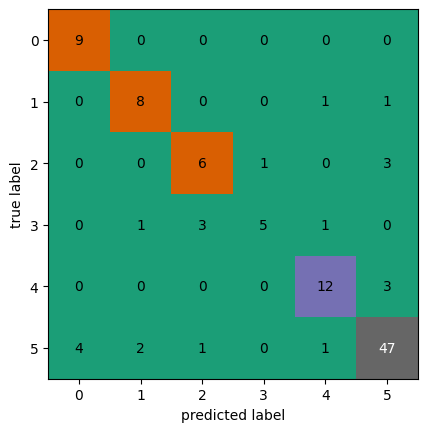

In [136]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [137]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.69      1.00      0.82         9
          FR       0.73      0.80      0.76        10
          GE       0.60      0.60      0.60        10
          IT       0.83      0.50      0.62        10
          UK       0.80      0.80      0.80        15
          US       0.87      0.85      0.86        55

    accuracy                           0.80       109
   macro avg       0.75      0.76      0.74       109
weighted avg       0.80      0.80      0.80       109



In [89]:
from sklearn.metrics import f1_score, accuracy_score

f1s = []
accs = []

for i in range(1, 40):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    predict = neigh.predict(X_test)
    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

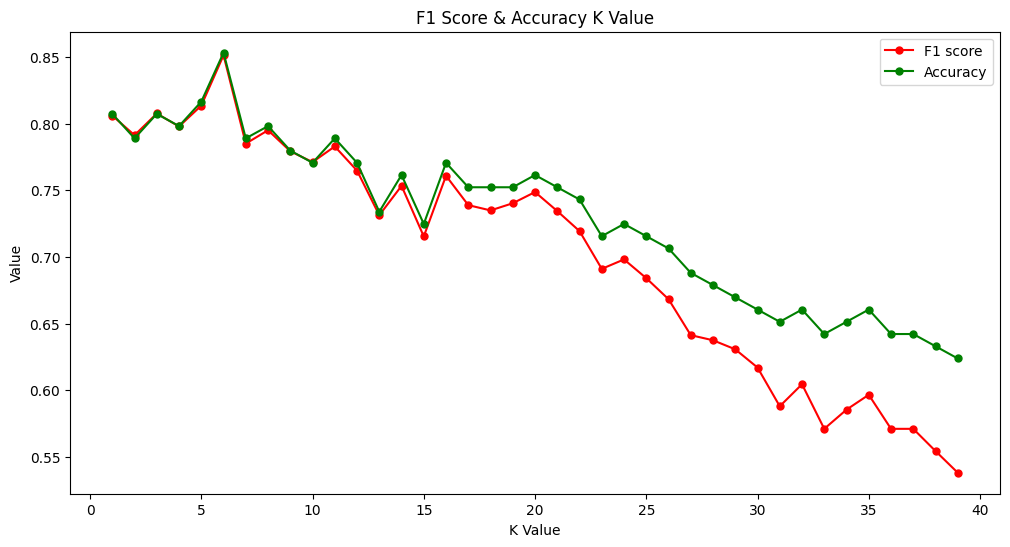

In [76]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 40), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 40), accs, color='green', marker='o', markersize=5)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('K Value')
plt.ylabel('Value')

# Decision Tree

In [132]:
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(criterion="gini", max_depth=8, min_samples_split=30, max_leaf_nodes=6, min_samples_leaf=4)
tree_clf.fit(X_train, y_train)

predict = tree_clf.predict(X_test)

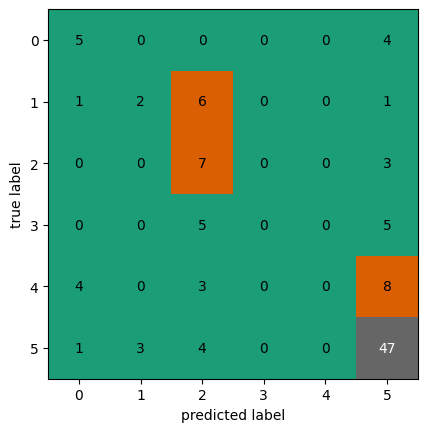

In [119]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [133]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.45      0.56      0.50         9
          FR       0.40      0.20      0.27        10
          GE       0.28      0.70      0.40        10
          IT       0.00      0.00      0.00        10
          UK       0.00      0.00      0.00        15
          US       0.69      0.85      0.76        55

    accuracy                           0.56       109
   macro avg       0.30      0.39      0.32       109
weighted avg       0.45      0.56      0.49       109



d:\Programs\Python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programs\Python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programs\Python3.11\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=595)
rfc.fit(X_train, y_train)

predict = rfc.predict(X_test)

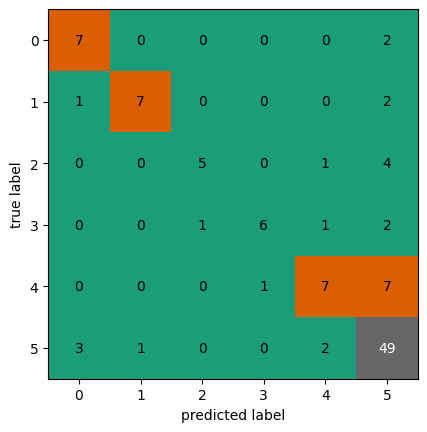

In [97]:
plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [112]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          ES       0.78      0.78      0.78         9
          FR       0.86      0.60      0.71        10
          GE       0.86      0.60      0.71        10
          IT       0.86      0.60      0.71        10
          UK       0.73      0.53      0.62        15
          US       0.75      0.93      0.83        55

    accuracy                           0.77       109
   macro avg       0.80      0.67      0.72       109
weighted avg       0.78      0.77      0.76       109



In [ ]:
from sklearn.metrics import f1_score, accuracy_score

In [99]:
f1s = []
accs = []

for i in range(500, 600):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    predict = rfc.predict(X_test)

    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

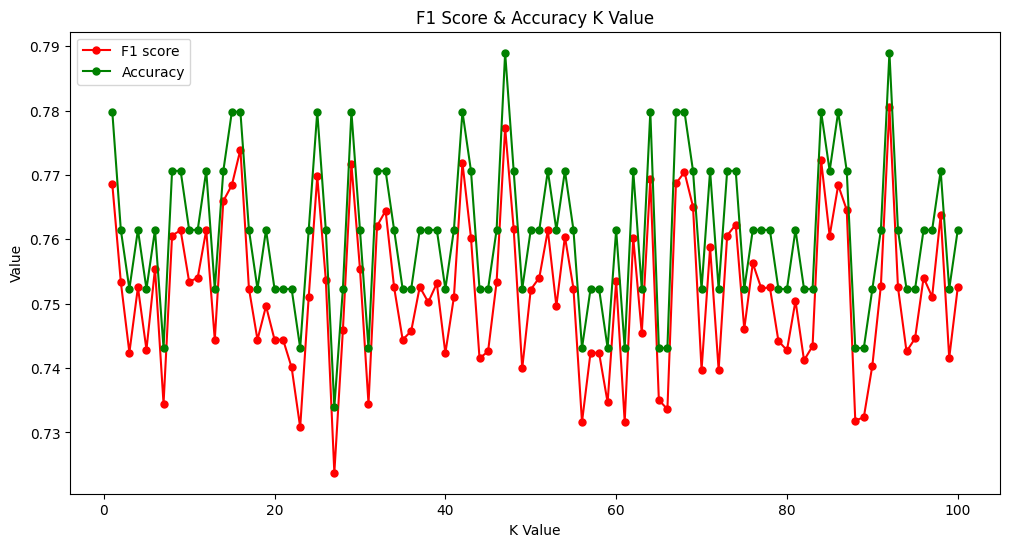

In [30]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 101), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 101), accs, color='green', marker='o', markersize=5)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('Numero di alberi')
plt.ylabel('Value')

### Altri test
Per controllare il valore di f1 score maggiore

In [ ]:
f1s = []
accs = []

for i in range(950, 1000):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    predict = rfc.predict(X_test)

    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

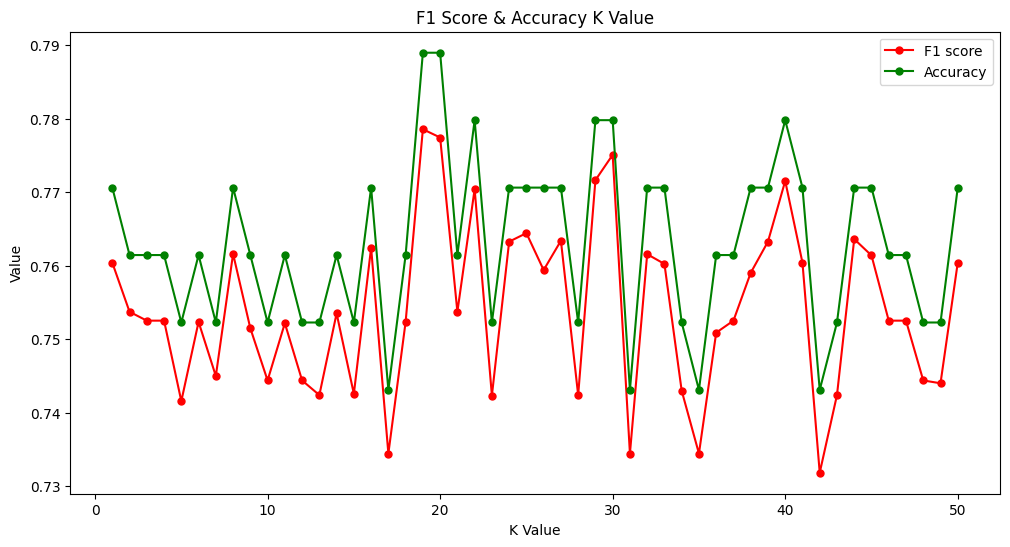

In [32]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 51), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 51), accs, color='green', marker='o', markersize=5)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('Numero di alberi')
plt.ylabel('Value')

In [34]:
f1s = []
accs = []

for i in range(10000, 10040):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train, y_train)
    predict = rfc.predict(X_test)

    f1s.append(f1_score(y_test, predict, average='weighted'))
    accs.append(accuracy_score(y_test, predict))

Text(0, 0.5, 'Value')

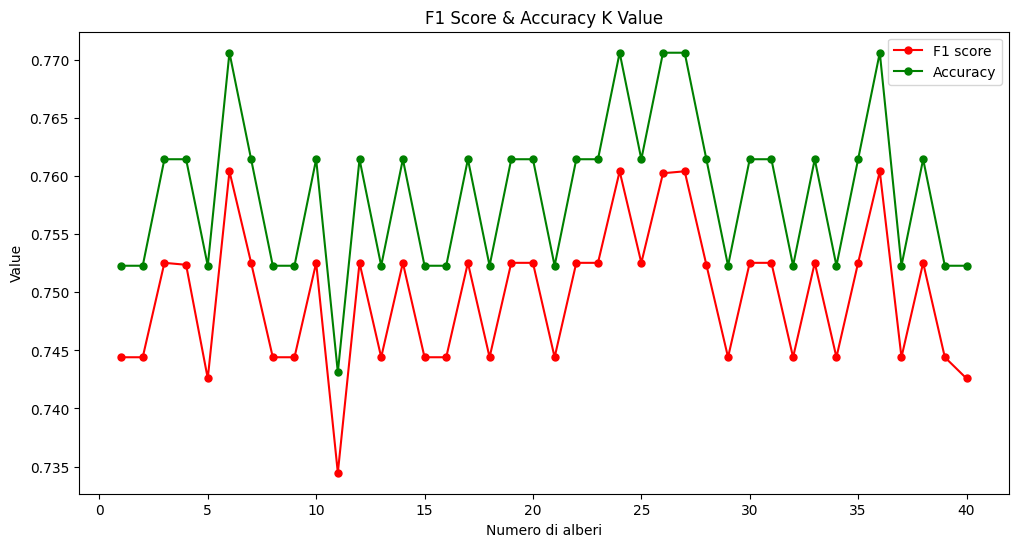

In [35]:
plt.figure(figsize=(12, 6))

plt.plot(range(1, 41), f1s, color='red', marker='o', markersize=5)
plt.plot(range(1, 41), accs, color='green', marker='o', markersize=5)

plt.legend(['F1 score', 'Accuracy'])

plt.title('F1 Score & Accuracy K Value')
plt.xlabel('Numero di alberi')
plt.ylabel('Value')